# Logistic Regression-Telecom Churn Classification problem

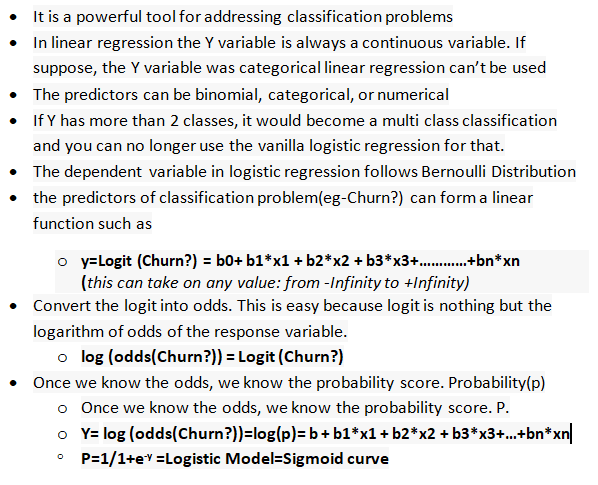

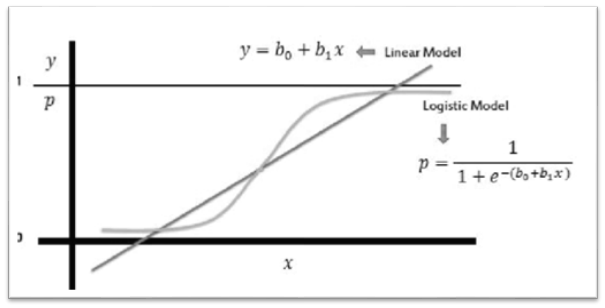

# Step 1- Import Necessary Packages

In [5]:
#import packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [6]:
#Python magic command to print many statements on the same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Step 2-Import data set 'Telco-Customer-Churn Dataset'¶

In [24]:
df=pd.read_csv('F:/Data/BA05_Module 3_Telco-Customer-Churn Dataset.csv',sep=',')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [10]:
#Remove Customer id Columns 
df=df.iloc[:,1:22]

In [11]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Step 3-EDA Report

In [13]:
#!pip install pandas-profiling
import pandas_profiling

In [14]:
eda_report=pandas_profiling.ProfileReport(df)
eda_report

In [15]:
# To check if there are any null Values
pd.isnull(df).any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [16]:
print('Counts of Labels')
df.groupby("Churn").size()

Counts of Labels


Churn
No     5174
Yes    1869
dtype: int64

In [17]:
df.shape
df.columns

(7043, 20)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [20]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [39]:
# To convert objects to int
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=pd.Categorical(df[col]).codes

In [55]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0


In [41]:
#Converting dtype objects to categorical (int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null int16
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null int16
Churn               7043 non-null int8
dtypes: float64(1), int16(2), int64(2), int8(16)
memory usage: 302.

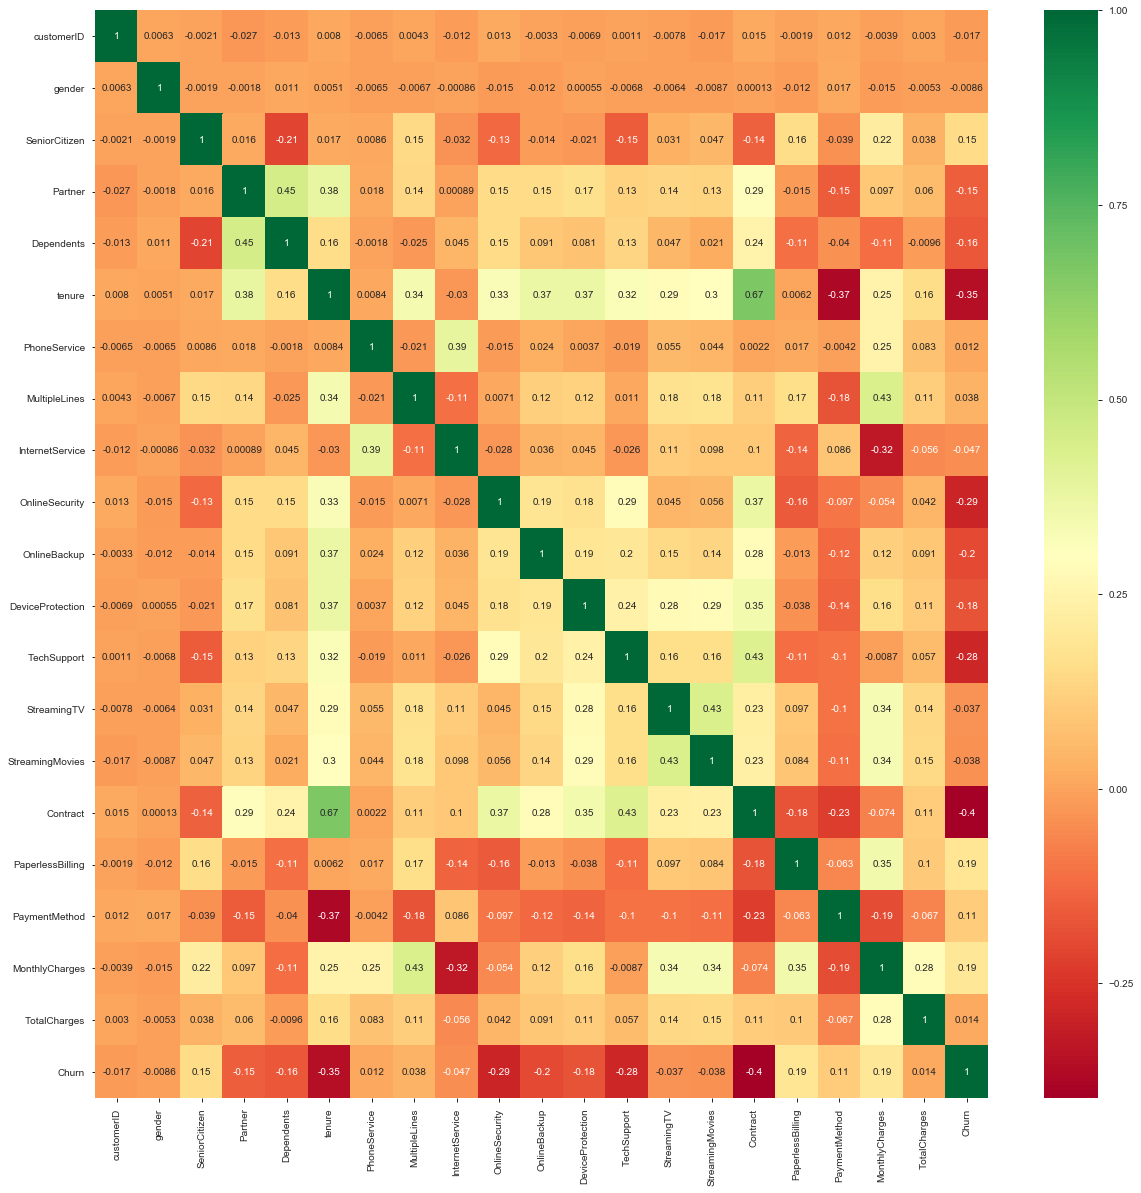

In [42]:
#Plot correlation heat map
x=df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

## Split the data in to X (observations) & Response(Y)

In [43]:
# convert given data into x and y variables
y=df.Churn
x=df.drop('Churn',axis=1)
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

# Split the data in to Train (70%) and Test (30%)

In [44]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(4930, 20)

(4930,)

(2113, 20)

(2113,)

## Step 4- Build a Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [46]:
log.fit(train_x,train_y)

C:\Users\gauth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
log.coef_

array([[-3.16824739e-05, -9.97358755e-03,  2.76264648e-01,
         5.50505132e-02, -9.16285685e-02, -3.62159411e-02,
        -8.51403301e-01,  1.13720459e-01,  2.07323935e-01,
        -2.64180286e-01, -9.71604278e-02, -1.08434481e-01,
        -2.70944854e-01,  1.69549028e-02,  5.43080905e-02,
        -6.67891182e-01,  2.59049073e-01,  2.71925386e-02,
         2.56753420e-02,  4.73587306e-05]])

In [52]:
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values('Coeff',ascending=False)

,Variable,Coeff
2,SeniorCitizen,0.276265
16,PaperlessBilling,0.259049
8,InternetService,0.207324
7,MultipleLines,0.113720
3,Partner,0.055051
14,StreamingMovies,0.054308
17,PaymentMethod,0.027193
18,MonthlyCharges,0.025675
13,StreamingTV,0.016955
19,TotalCharges,0.000047


# Confusion Matrix

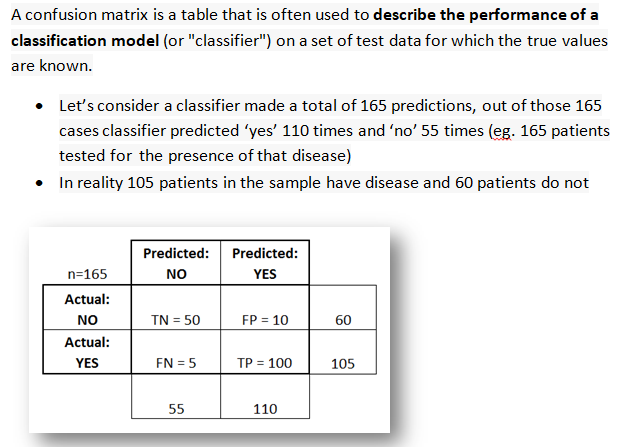

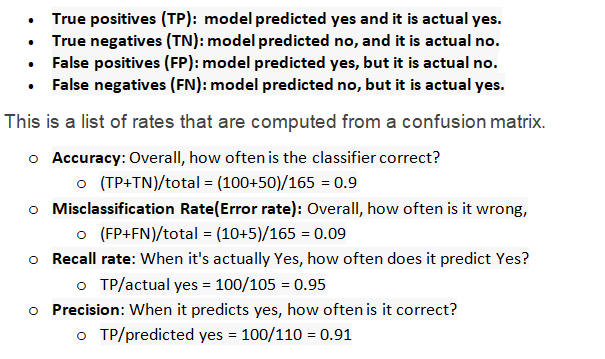

# Step-5: Measure the performance of the model From Confusion Matrix

confusion Matrix


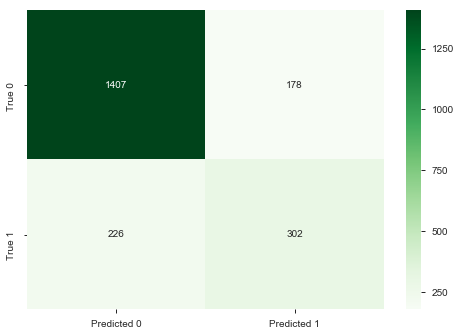

In [53]:
print('confusion Matrix')
cf = metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap ="Greens", fmt="d", xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [49]:
classes=log.predict(test_x)
print ('Accuracy Score')
print (metrics.accuracy_score(test_y,classes))
print ('Precision/Recall Metrics')
print (metrics.classification_report(test_y,classes))
print ('AUC')
auc = metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.8088026502602934
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

   micro avg       0.81      0.81      0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113

AUC


0.729833428926489

# ROC Curve and AOC

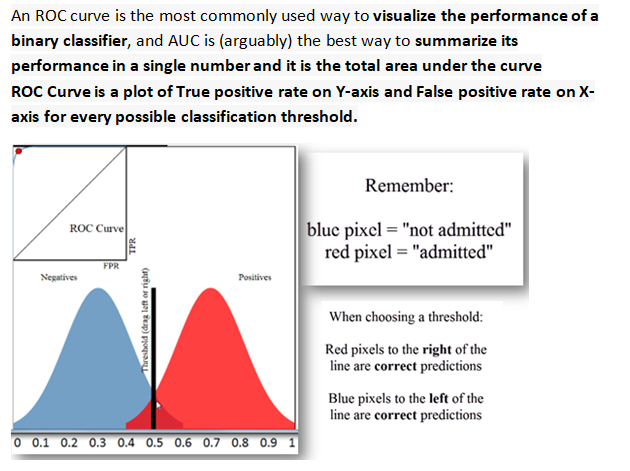

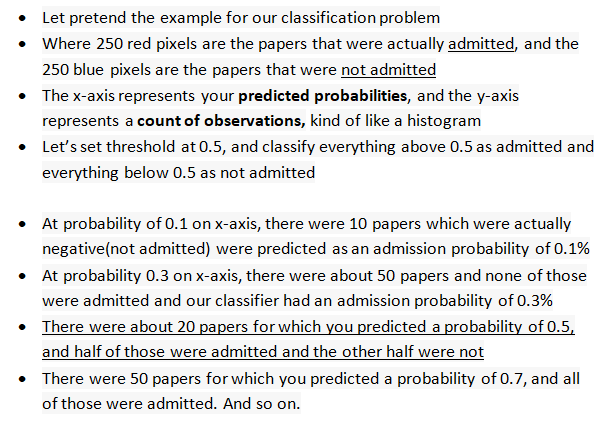

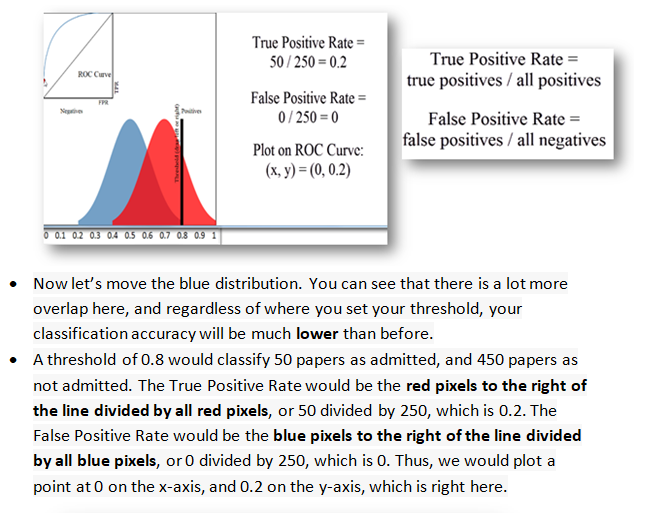

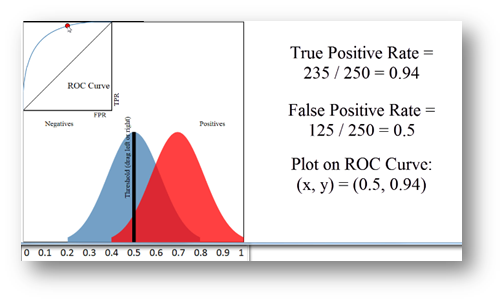

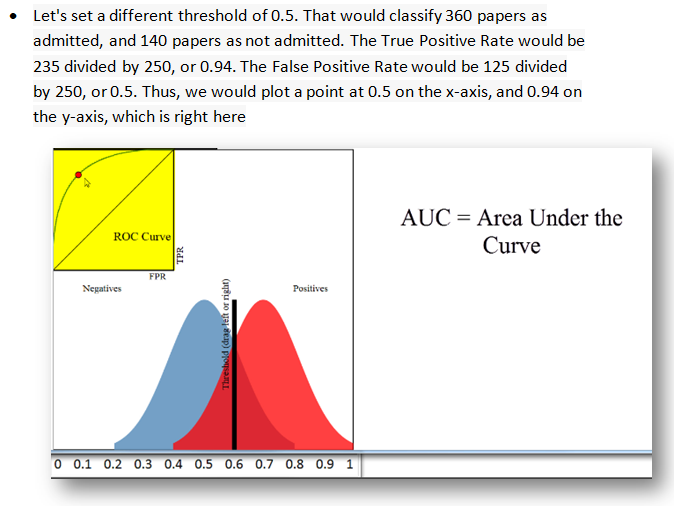

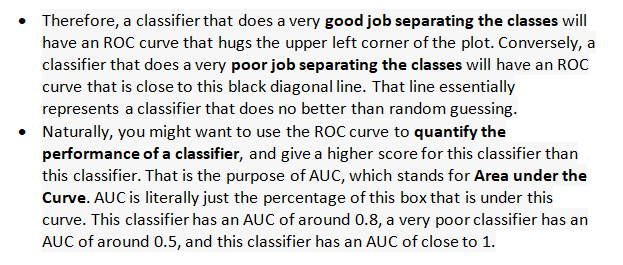

# Step 6- AUC

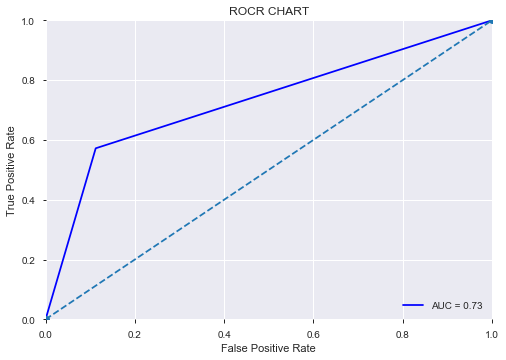

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();